In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df= pd.read_csv("suagar.csv")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [9]:
df.shape

(103, 7)

Data Cleaning

In [10]:
df["Production (Tons)"]= df["Production (Tons)"].str.replace(".",',').str.replace('','')
df["Production per Person (Kg)"]= df["Production per Person (Kg)"].str.replace(".",'').str.replace(",",'.')
df["Acreage (Hectare)"]= df["Acreage (Hectare)"].str.replace(".",'').str.replace("",'')
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".",'').str.replace(",",'.')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,"768,678,382",3668.531,10226205,75167.5
1,1,India,Asia,"348,448,000",260721,4950000,70393.5
2,2,China,Asia,"123,059,739",88287,1675215,73459.1
3,3,Thailand,Asia,"87,468,496",1264.303,1336575,65442.2
4,4,Pakistan,Asia,"65,450,704",324219,1130820,57879


In [11]:
df.rename(columns={"production(Tons)": 'Production (Tons)'}, inplace = True)
df.rename(columns={"Production per Person (Kg)": 'Production per Person (Kg)'}, inplace = True)
df.rename(columns={"Acreage (Hectare)": 'Acreage (Hectare)'}, inplace = True)
df.rename(columns={"Yield (Kg / Hectare)": 'Yield (Kg / Hectare)'}, inplace = True)
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,"768,678,382",3668.531,10226205,75167.5
1,1,India,Asia,"348,448,000",260721,4950000,70393.5
2,2,China,Asia,"123,059,739",88287,1675215,73459.1
3,3,Thailand,Asia,"87,468,496",1264.303,1336575,65442.2
4,4,Pakistan,Asia,"65,450,704",324219,1130820,57879


In [12]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [13]:
df[df["Acreage (Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [14]:
df=df.dropna().reset_index()
df.head()

,index,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,0,Brazil,South America,"768,678,382",3668.531,10226205,75167.5
1,1,1,India,Asia,"348,448,000",260721,4950000,70393.5
2,2,2,China,Asia,"123,059,739",88287,1675215,73459.1
3,3,3,Thailand,Asia,"87,468,496",1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,"65,450,704",324219,1130820,57879


In [15]:
df["Production (Tons)"]= pd.to_numeric(df["Production (Tons)"],errors='coerce')
df["Production per Person (Kg)"]= pd.to_numeric(df["Production per Person (Kg)"],errors='coerce')
df["Acreage (Hectare)"]= pd.to_numeric(df["Acreage (Hectare)"],errors='coerce')
df["Yield (Kg / Hectare)"]=pd.to_numeric (df["Yield (Kg / Hectare)"],errors='coerce')
df.dtypes

index                           int64
Unnamed: 0                      int64
Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)               int64
Yield (Kg / Hectare)          float64
dtype: object

In [16]:
df.nunique()

index                         102
Unnamed: 0                    102
Country                       102
Continent                       6
Production (Tons)               9
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

Univariate Analysis


In [17]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

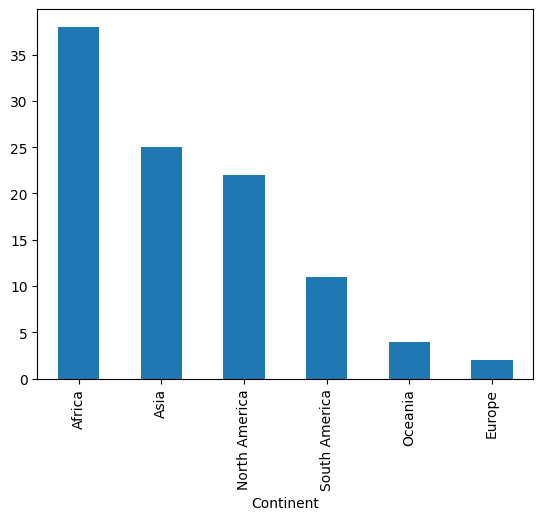

In [18]:
df['Continent'].value_counts().plot(kind='bar')

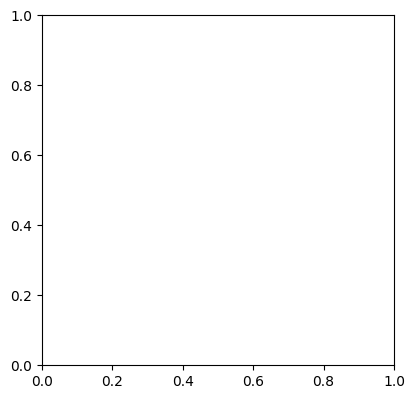

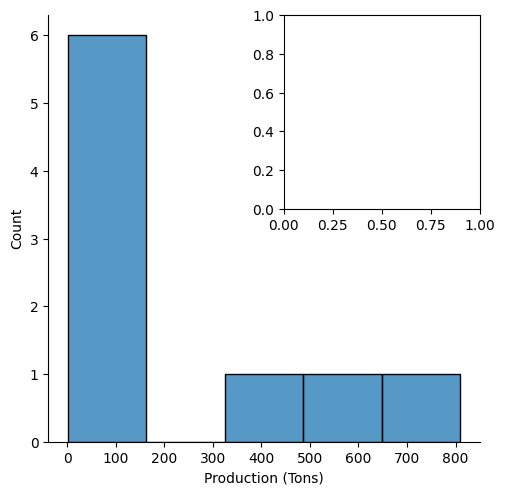

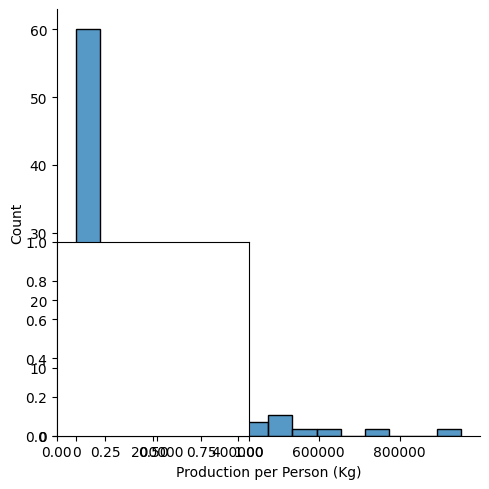

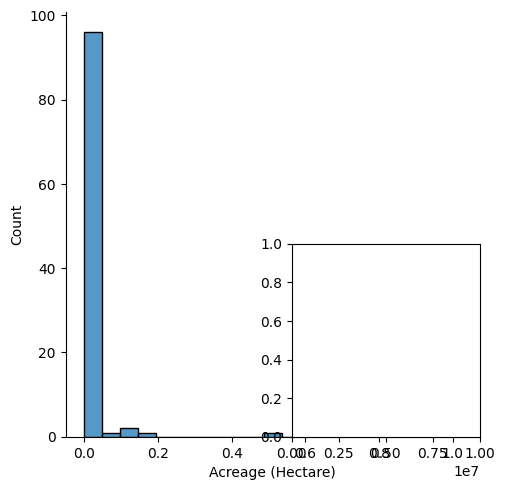

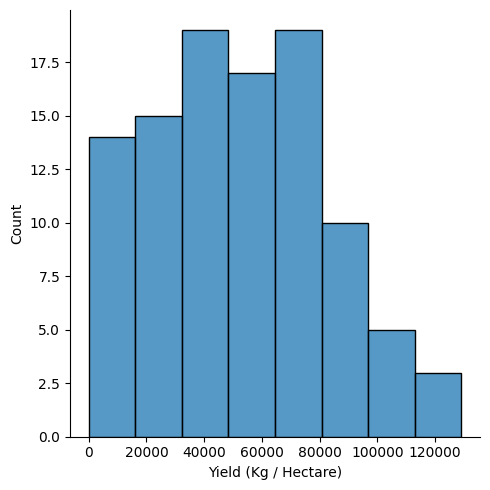

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.displot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.displot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.displot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.displot(df["Yield (Kg / Hectare)"])



<Axes: ylabel='Yield (Kg / Hectare)'>

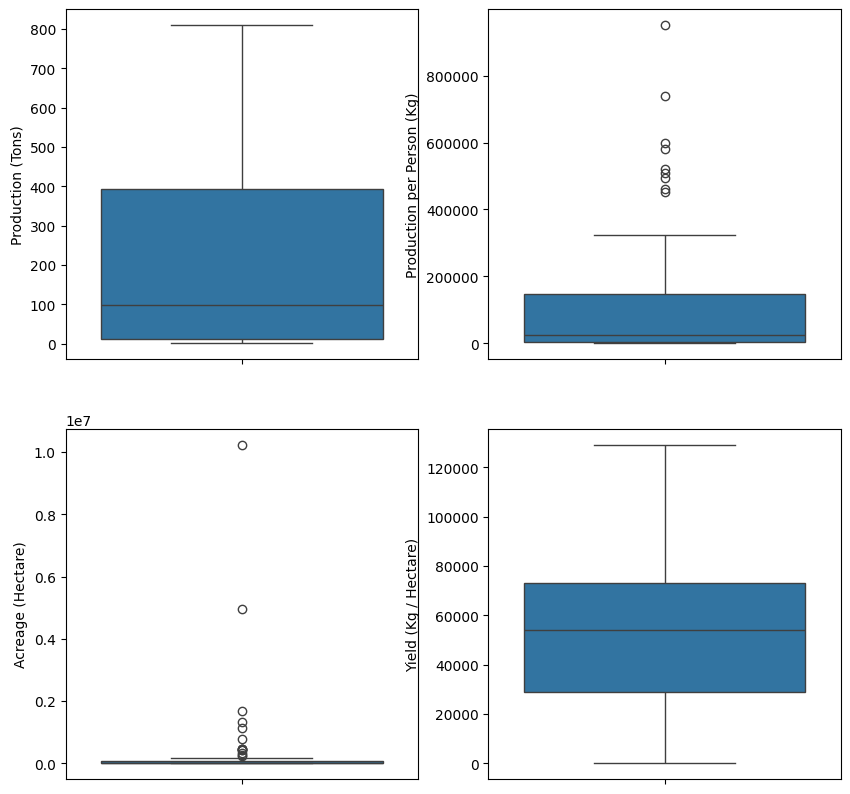

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])
plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])

In [21]:
df = df.drop(columns=[col for col in df.columns if "index" in col])
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])
df["Production (Tons)"]= (df["Acreage (Hectare)"] * df['Yield (Kg / Hectare)'])/1000
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,7.686783e+08,3668.531,10226205,75167.5
1,India,Asia,3.484478e+08,260721.000,4950000,70393.5
2,China,Asia,1.230598e+08,88287.000,1675215,73459.1
3,Thailand,Asia,8.746841e+07,1264.303,1336575,65442.2
4,Pakistan,Asia,6.545073e+07,324219.000,1130820,57879.0


In [22]:
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.704738e+07,112952.435755,2.498981e+05,52628.078431
std,8.418305e+07,176651.341929,1.137003e+06,30504.676683
min,0.000000e+00,0.000000,0.000000e+00,10.000000
25%,2.329323e+04,3671.910000,1.104000e+03,29072.025000
50%,6.461978e+05,25572.500000,1.655800e+04,54108.950000
75%,4.266258e+06,146384.750000,8.047400e+04,73282.700000
max,7.686783e+08,951087.000000,1.022620e+07,129049.300000


In [23]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,7.686783e+08,3668.531,10226205,75167.5
1,India,Asia,3.484478e+08,260721.000,4950000,70393.5
2,China,Asia,1.230598e+08,88287.000,1675215,73459.1
3,Thailand,Asia,8.746841e+07,1264.303,1336575,65442.2
4,Pakistan,Asia,6.545073e+07,324219.000,1130820,57879.0


Bivavieat Analysis

In [24]:
df_new = df[["Country",'Production (Tons)']].set_index("Country")
df_new

,Production (Tons)
Country,
Brazil,7.686783e+08
India,3.484478e+08
China,1.230598e+08
Thailand,8.746841e+07
Pakistan,6.545073e+07
...,...
Spain,3.923685e+02
Lebanon,8.515920e+01
Singapore,5.000000e-02


In [25]:
df_new["Production (Tons)_percent"] = df_new["Production (Tons)"]*100/df_new["Production (Tons)"].sum()
df_new

,Production (Tons),Production (Tons)_percent
Country,,
Brazil,7.686783e+08,4.420656e+01
India,3.484478e+08,2.003918e+01
China,1.230598e+08,7.077149e+00
Thailand,8.746841e+07,5.030294e+00
Pakistan,6.545073e+07,3.764061e+00
...,...,...
Spain,3.923685e+02,2.256505e-05
Lebanon,8.515920e+01,4.897492e-06
Singapore,5.000000e-02,2.875492e-09


<Axes: ylabel='Production (Tons)_percent'>

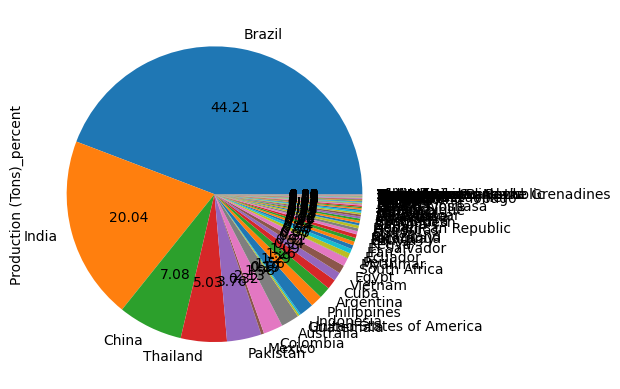

In [26]:
df_new["Production (Tons)_percent"].plot(kind='pie',autopct= '%.2f')

<Axes: xlabel='Country'>

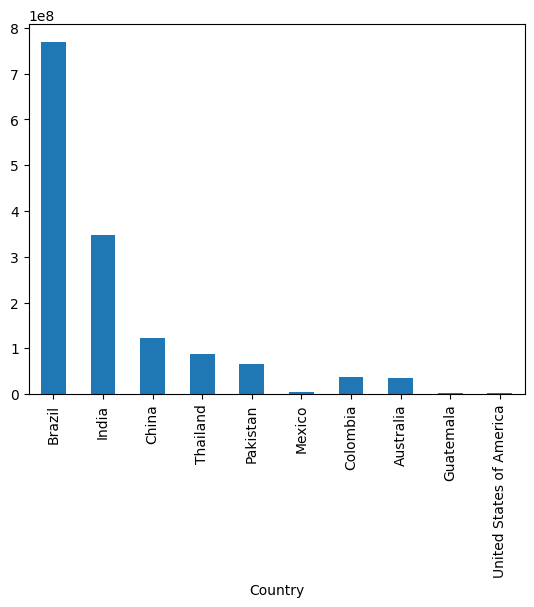

In [27]:
df_new["Production (Tons)"].head(10).plot(kind="bar")

C:\Users\Treksha Pachadhare\AppData\Local\Temp\ipykernel_15740\2874577400.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


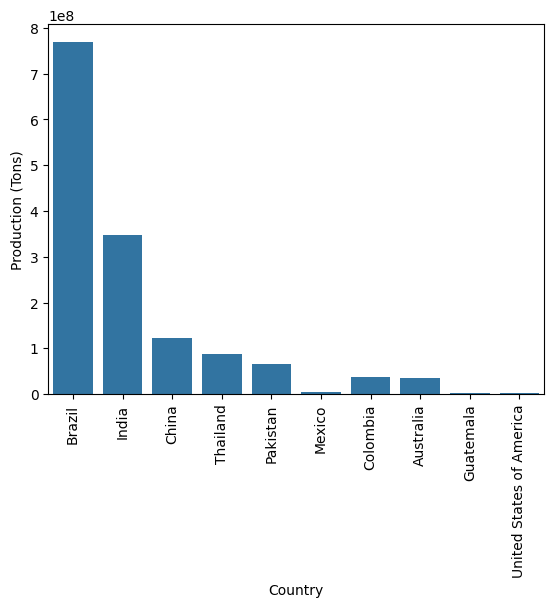

In [28]:
df_acr = df.sort_values("Acreage (Hectare)", ascending=False)
ax= sns.barplot(data = df.head(10), x = "Country", y = "Production (Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

C:\Users\Treksha Pachadhare\AppData\Local\Temp\ipykernel_15740\944785963.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


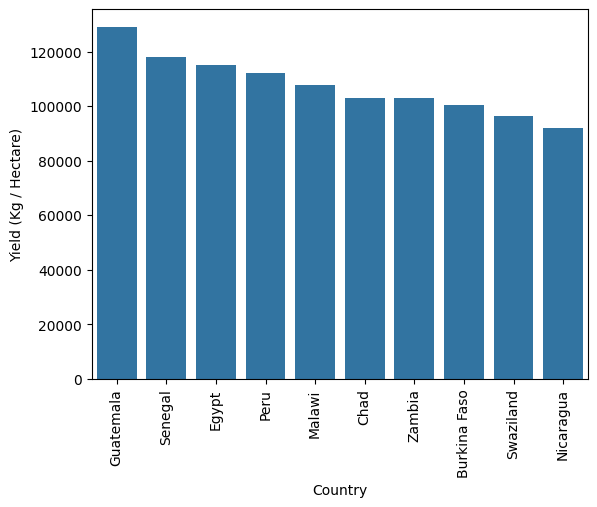

In [29]:
df_yield = df.sort_values("Yield (Kg / Hectare)", ascending = False)
ax= sns.barplot(data = df_yield.head(10), x = "Country", y = "Yield (Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [30]:
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                            Production (Tons)  Production per Person (Kg)  \
Production (Tons)                    1.000000                    0.001086   
Production per Person (Kg)           0.001086                    1.000000   
Acreage (Hectare)                    0.997170                    0.012557   
Yield (Kg / Hectare)                 0.130380                    0.017999   

                            Acreage (Hectare)  Yield (Kg / Hectare)  
Production (Tons)                    0.997170              0.130380  
Production per Person (Kg)           0.012557              0.017999  
Acreage (Hectare)                    1.000000              0.113433  
Yield (Kg / Hectare)                 0.113433              1.000000  


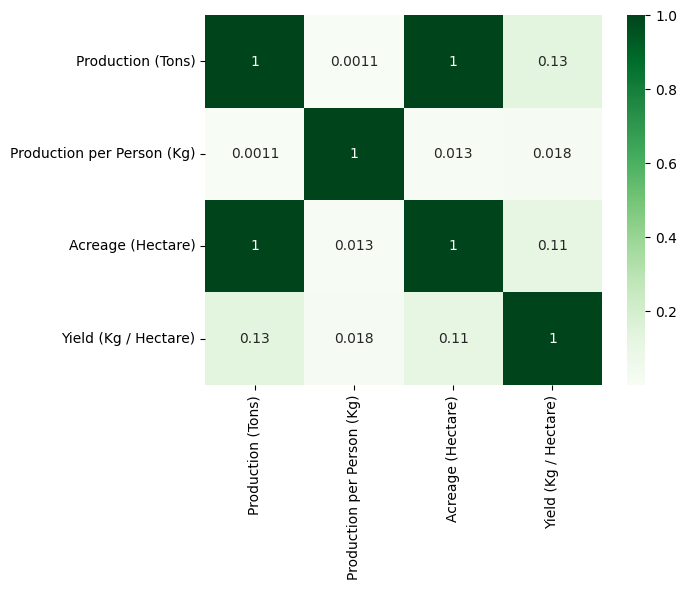

In [31]:
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot = True, cmap= 'Greens')
plt.show()

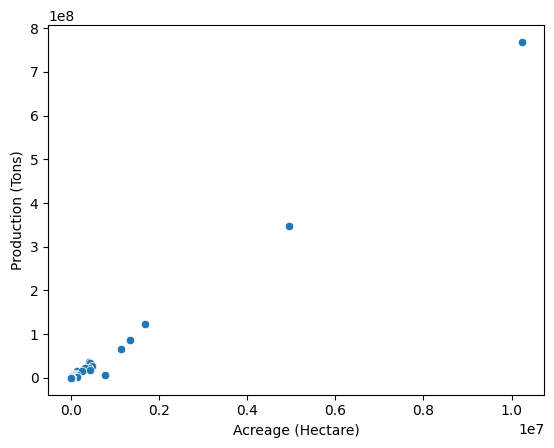

In [32]:
sns.scatterplot(data= df, x= "Acreage (Hectare)", y= "Production (Tons)")
plt.show()

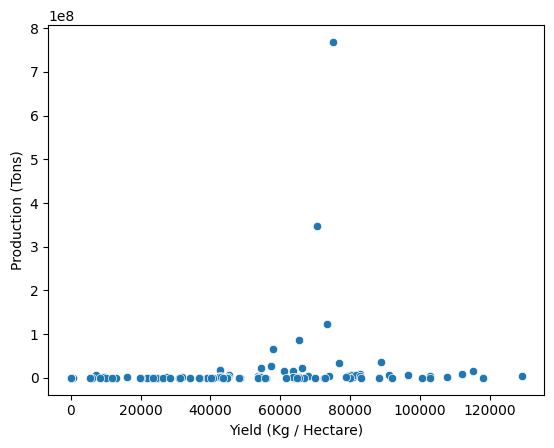

In [33]:
sns.scatterplot(data= df, x= "Yield (Kg / Hectare)", y= "Production (Tons)")
plt.show()

In [34]:
df_continent = df.groupby("Continent").sum()
df_continent

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,8.417174e+07,2332636.293,1439089,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,7.111244e+08,1857769.303,10608319,1171871.4
Europe,PortugalSpain,5.865381e+03,536.000,71,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,5.158411e+07,3796081.508,1581983,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,3.617759e+07,28593.605,490909,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,8.557691e+08,3505531.738,11369236,677192.7


In [35]:
print(df_continent.columns.tolist())
df_continent = df.groupby("Continent")[["Acreage (Hectare)","Production (Tons)",'Production per Person (Kg)',"Yield (Kg / Hectare)"]].sum()

['Country', 'Production (Tons)', 'Production per Person (Kg)', 'Acreage (Hectare)', 'Yield (Kg / Hectare)']


<Axes: xlabel='Continent'>

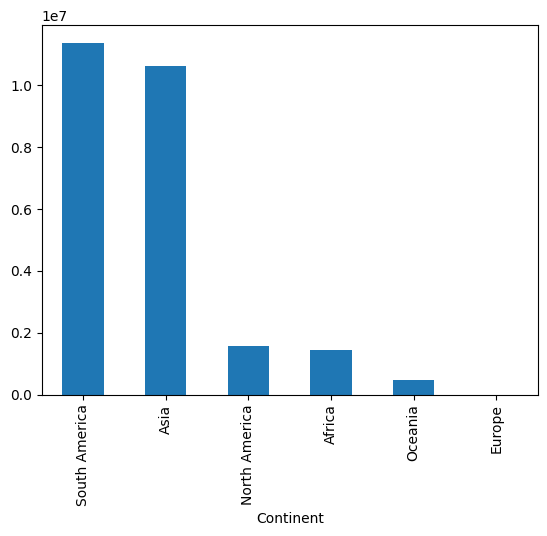

In [36]:
df_continent["Acreage (Hectare)"].sort_values( ascending= False).plot(kind="bar")

<Axes: xlabel='Continent'>

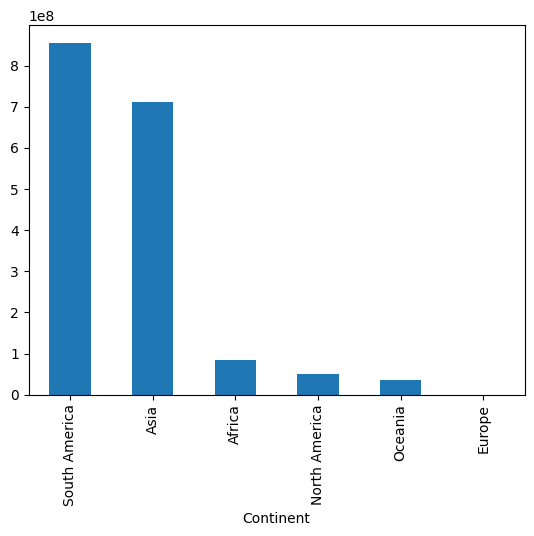

In [37]:
df_continent["Production (Tons)"].sort_values( ascending= False).plot(kind="bar")

In [38]:
df_continent = df.groupby("Continent").count()[['Country']]
df_continent.rename(columns={"Country": "number_of_countries"}, inplace=True)
df_continent


,number_of_countries
Continent,
Africa,38
Asia,25
Europe,2
North America,22
Oceania,4
South America,11


<Axes: ylabel='Production (Tons)'>

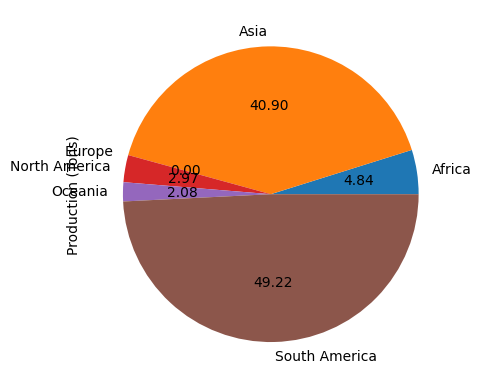

In [ ]:
df_continent["Production (Tons)"].plot(kind= 'pie', autopct= "%.2f")

In [ ]:
df_continent.corr()

,Acreage (Hectare),Production (Tons),Production per Person (Kg),Yield (Kg / Hectare)
Acreage (Hectare),1.000000,0.995485,0.463215,0.111166
Production (Tons),0.995485,1.000000,0.434115,0.068267
Production per Person (Kg),0.463215,0.434115,1.000000,0.542961
Yield (Kg / Hectare),0.111166,0.068267,0.542961,1.000000
